# Задание 1

Исследуйте зависимость качества классификации от количества классификаторов в ансамбле для алгоритмов бэггинга на наборе данных glass.csv с различными базовыми классификаторами. Постройте графики зависимости качества классификации при различном числе классификаторов, объясните полученные результаты.

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

In [3]:
data_glass = pd.read_csv('lab4_files/glass.csv')
data_glass.drop('Id', axis=1, inplace=True)
data_glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


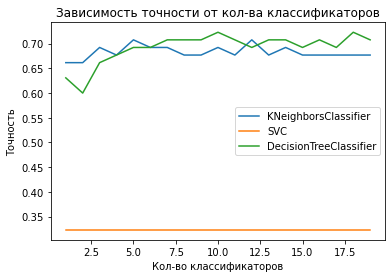

In [27]:
x_train, x_test, y_train, y_test = train_test_split(
    data_glass.drop(['Type'], axis=1), 
    data_glass['Type'], 
    test_size=0.3)

k_neighbors_classifier = KNeighborsClassifier(n_neighbors=3)
svc_classifier = SVC(kernel='rbf')
decision_tree_classifier = DecisionTreeClassifier()

classifier_list = [k_neighbors_classifier, svc_classifier, decision_tree_classifier]
n_estimators_list = [i for i in range(1, 20)]

for classifier in classifier_list:
    accuracy = []
    
    for n_estimators in n_estimators_list:
        bagging = BaggingClassifier(
            base_estimator=classifier, 
            random_state=1,
            n_estimators=n_estimators)
        bagging.fit(x_train, y_train)

        predicted = bagging.predict(x_test)
        accuracy.append(accuracy_score(y_test, predicted))
    
    plt.plot(n_estimators_list, accuracy, label=classifier.__class__.__name__)  
        
plt.title("Зависимость точности от кол-ва классификаторов")
axes = plt.gca()
axes.set_ylabel('Точность')
axes.set_xlabel('Кол-во классификаторов')
axes.legend()
plt.show()

# Задание 2

Исследуйте зависимость качества классификации от количества классификаторов в ансамбле для алгоритма бустинга (например, AdaBoost) на наборе данных vehicle.csv с различными базовыми классификаторами. Постройте графики зависимости качества классификации при различном числе классификаторов, объясните полученные результаты.

In [36]:
data_vehicle = pd.read_csv('lab4_files/vehicle.csv')

label_encoder = LabelEncoder() 
data_vehicle['Class']= label_encoder.fit_transform(data_vehicle['Class']) 

data_vehicle

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,3
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,2
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,3
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195,2
842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197,3
843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201,2
844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195,2


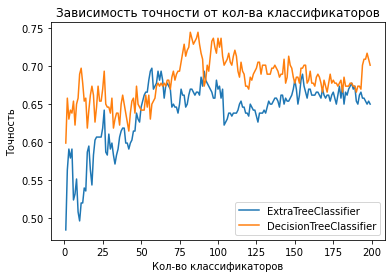

In [49]:
x_train, x_test, y_train, y_test = train_test_split(
    data_vehicle.drop(['Class'], axis=1), 
    data_vehicle['Class'], 
    test_size=0.3)

decision_tree_classifier = DecisionTreeClassifier(max_depth=3)
extra_tree_classifier = ExtraTreeClassifier(max_depth=3)

classifier_list = [extra_tree_classifier, decision_tree_classifier]
n_estimators_list = [i for i in range(1, 200)]

for classifier in classifier_list:
    accuracy = []
    
    for n_estimators in n_estimators_list:
        ada_boost = AdaBoostClassifier(
            base_estimator=classifier,
            random_state=1,
            n_estimators=n_estimators)
        ada_boost.fit(x_train, y_train)

        predicted = ada_boost.predict(x_test)
        accuracy.append(accuracy_score(y_test, predicted))
    
    plt.plot(n_estimators_list, accuracy, label=classifier.__class__.__name__)  
        
plt.title("Зависимость точности от кол-ва классификаторов")
axes = plt.gca()
axes.set_ylabel('Точность')
axes.set_xlabel('Кол-во классификаторов')
axes.legend()
plt.show()

# Задание 3

Постройте мета-классификатор для набора данных titanic.csv используя стекинг и оцените качество классификации.

In [207]:
data_titanic = pd.read_csv('lab4_files/titanic.csv')
data_titanic.drop('Name', axis=1, inplace=True)
data_titanic.drop('Ticket', axis=1, inplace=True)
data_titanic.drop('Cabin', axis=1, inplace=True)

label_encoder = LabelEncoder() 
data_titanic['Embarked'].fillna('0', inplace=True)

data_titanic['Sex']= label_encoder.fit_transform(data_titanic['Sex']) 
data_titanic['Embarked']= label_encoder.fit_transform(data_titanic['Embarked']) 

data_titanic.fillna(data_titanic.mean(), inplace=True)
data_titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,3
1,2,1,1,0,38.000000,1,0,71.2833,1
2,3,1,3,0,26.000000,0,0,7.9250,3
3,4,1,1,0,35.000000,1,0,53.1000,3
4,5,0,3,1,35.000000,0,0,8.0500,3
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,3
887,888,1,1,0,19.000000,0,0,30.0000,3
888,889,0,3,0,29.699118,1,2,23.4500,3
889,890,1,1,1,26.000000,0,0,30.0000,1


In [212]:
x_train, x_test, y_train, y_test = train_test_split(
    data_titanic.drop(['Survived'], axis=1), 
    data_titanic['Survived'], 
    test_size=0.3)


k_neighbors_classifier = KNeighborsClassifier(n_neighbors=3)
decision_tree_classifier1 = DecisionTreeClassifier(max_depth=1)
decision_tree_classifier2 = DecisionTreeClassifier(max_depth=3)

classifier_list = [
    ('dt1', decision_tree_classifier1),
    ('dt2', decision_tree_classifier2),
    ('knn', k_neighbors_classifier)
]


stacking_classifier = StackingClassifier(estimators=classifier_list)
stacking_classifier.fit(x_train, y_train)

predicted = stacking_classifier.predict(x_test)
accuracy_score(y_test, predicted)

0.832089552238806